In [1]:
# !pip install tensorflow scikit-learn numpy matplotlib

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
import pylab
import tensorflow as tf
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statsmodels
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
# Form dataset matrix
def create_dataset(dataset, previous=1):
    dataX, dataY = [], []
    for i in range(dataset.shape[0]-previous-1):
        a = dataset[i:(i+previous), :]
        dataX.append(a)
        dataY.append(dataset[i + previous, :])
    return np.array(dataX), np.array(dataY)

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

# load dataset
df = read_csv('dccelectricitycivicsblocks34p20130221-1840.csv', engine='python', skipfooter=3)
df

,Civic Offices Blocks 3 and 4 KWh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,13/02/2013,96,25,25,25.5,24.5,25,26,25.5,25.5,...,33,32.5,30.5,27.5,26,26,26,26,25.5,26.5
689,14/02/2013,96,26,25.5,26,25.5,25,27,25.5,26.5,...,31,30,30.5,29,28,26.5,25.5,25,25.5,25
690,15/02/2013,96,25.5,24.5,25.5,24.5,25,26.5,25,25.5,...,29,27,28,28,25.5,26,25.5,25.5,24.5,25
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24


In [5]:
df2=df.rename(columns=df.iloc[0])
df3=df2.drop(df.index[0])
df3
df3.drop(df3.index[0])
df4=df3.drop('Date', axis=1)
df5=df4.drop('Values', axis=1)
df5
df6=df5.dropna()
df7=df6.values
df7
df7.shape
dataset=np.array(df7,dtype=float)#np.sum(df7, axis=1, dtype=float)
#dataset
dataset.shape

(680, 96)

In [6]:
# meankwh=np.mean(dataset)
print (dataset)
dataset=dataset.reshape((-1,96))

[[32.10000229 32.40000153 33.60000229 ... 32.70000076 31.50000191
  33.60000229]
 [32.10000229 33.60000229 35.10000229 ... 33.45000076 32.10000229
  32.10000229]
 [31.80000114 32.40000153 30.45000076 ... 31.5        33.45000076
  32.55000305]
 ...
 [25.5        24.5        25.5        ... 25.5        24.5
  25.        ]
 [25.         25.         24.5        ... 24.5        25.
  24.        ]
 [24.5        24.         24.         ... 25.         25.
  25.        ]]


In [7]:
# normalize dataset with MinMaxScaler
# dataset=np.log(dataset)
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)
# dataset

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Handle infinite or large values
dataset[np.isinf(dataset)] = np.finfo(np.float64).eps
dataset[np.abs(dataset) > np.finfo(np.float64).max] = np.finfo(np.float64).max

# Normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.56875014, 0.64259928, 0.7386762 , ..., 0.66211602, 0.63197037,
        0.71844671],
       [0.56875014, 0.72924192, 0.84320582, ..., 0.71331056, 0.67658006,
        0.62135934],
       [0.55000007, 0.64259928, 0.51916387, ..., 0.58020472, 0.77695169,
        0.6504856 ],
       ...,
       [0.15625   , 0.07220215, 0.17421605, ..., 0.17064845, 0.11152416,
        0.16181229],
       [0.125     , 0.10830323, 0.10452963, ..., 0.10238907, 0.14869888,
        0.09708737],
       [0.09375   , 0.03610108, 0.06968642, ..., 0.13651876, 0.14869888,
        0.16181229]])

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import os
#dataset=dataset.reshape(-1,1)
#print (dataset.shape)

# Training and Test data partition
train_size = int(dataset.shape[0] * 0.8)
test_size = dataset.shape[0] - train_size
train, test = dataset[0:train_size,:1], dataset[train_size:dataset.shape[0],:1]
print(train.shape)
print(test.shape)

# reshape into X=t-50 and Y=t (MODIFY TIME HERE)
previous = 50
X_train, Y_train = create_dataset(train, previous)
X_test, Y_test = create_dataset(test, previous)
X_train = X_train.reshape(X_train.shape[0],-1)
Y_train = Y_train.reshape(Y_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
Y_test = Y_test.reshape(Y_test.shape[0],-1)
print (X_train.shape)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print (X_train.shape)
print (Y_train)

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1,X_train.shape[2])))
model.add(Dense(Y_train.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=1500, batch_size=10, verbose=1)
model.save(os.path.join('./model','lstm.h5'))

(544, 1)
(136, 1)
(493, 50)
(493, 1, 50)
[[0.44687498]
 [0.56875014]
 [0.484375  ]
 [0.6624999 ]
 [0.5875001 ]
 [0.60625005]
 [0.55937505]
 [0.42812502]
 [0.56875014]
 [0.67187524]
 [0.87812519]
 [0.70000005]
 [0.7281251 ]
 [0.50312507]
 [0.50312507]
 [0.5406251 ]
 [0.61562514]
 [0.8687501 ]
 [0.5875001 ]
 [0.46562505]
 [0.625     ]
 [0.765625  ]
 [0.73750019]
 [0.87812519]
 [0.8125    ]
 [0.59687495]
 [0.5875001 ]
 [0.34375   ]
 [0.69062519]
 [0.61562514]
 [0.65312505]
 [0.625     ]
 [0.45625007]
 [0.40937507]
 [0.50312495]
 [0.64375019]
 [0.6343751 ]
 [0.54999995]
 [0.66250014]
 [0.42812514]
 [0.45624995]
 [0.7281251 ]
 [0.70000005]
 [0.51250005]
 [0.59687519]
 [0.578125  ]
 [0.51250005]
 [0.47500002]
 [0.4937501 ]
 [0.65312505]
 [1.        ]
 [0.7750001 ]
 [0.5875001 ]
 [0.50312519]
 [0.55000007]
 [0.65312505]
 [0.765625  ]
 [0.93437505]
 [0.66250014]
 [0.66250014]
 [0.5406251 ]
 [0.56875014]
 [0.7093749 ]
 [0.73750019]
 [0.75625014]
 [0.59687519]
 [0.8687501 ]
 [0.5406251 ]
 [0.409

50/50 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 17/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 18/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 19/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 20/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 21/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 22/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 23/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 24/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 25/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 26/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 27/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 28/1500
50/50 [=========

50/50 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 116/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 117/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 118/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 119/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 120/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 121/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 122/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 123/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 124/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 125/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 126/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 127/1500
50/5

50/50 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 214/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 215/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 216/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 217/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 218/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 219/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 220/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 221/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 222/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 223/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 224/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 225/1500
50/5

50/50 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 312/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 313/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 314/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 315/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 316/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 317/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 318/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 319/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 320/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 321/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 322/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 323/1500
50/5

50/50 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 410/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 411/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 412/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 413/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 414/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 415/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 416/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 417/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 418/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 419/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 420/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 421/1500
50/5

50/50 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 508/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 509/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 510/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 511/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 512/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 513/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 514/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 515/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 516/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 517/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 518/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 519/1500
50/5

50/50 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 606/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 607/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 608/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 609/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 610/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 611/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 612/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 613/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 614/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 615/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 616/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 617/1500
50/5

50/50 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 704/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 705/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 706/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 707/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 708/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 709/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 710/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 711/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 712/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 713/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 714/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 715/1500
50/5

50/50 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 802/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 803/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 804/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 805/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 806/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 807/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 808/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 809/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 810/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 811/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 812/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 813/1500
50/5

50/50 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 900/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 901/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 902/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 903/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 904/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 905/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 906/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 907/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 908/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 909/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 910/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 911/1500
50/5

50/50 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 998/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 999/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 1000/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1001/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 1002/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 1003/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 1004/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1005/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 1006/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 1007/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 1008/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1009

50/50 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 1095/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 1096/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 1097/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 1098/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 1099/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 1100/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 1101/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1102/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 1103/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 1104/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 1105/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 11

50/50 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1192/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 1193/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1194/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1195/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1196/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 1197/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1198/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 1199/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1200/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 1201/1500
50/50 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 1202/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 12

50/50 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 1289/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1290/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1291/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 1292/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1293/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1294/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 1295/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 1296/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1297/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1298/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 1299/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 13

50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1386/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1387/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1388/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1389/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1390/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1391/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1392/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1393/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1394/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1395/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 1396/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 13

50/50 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1483/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 1484/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 1485/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 1486/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1487/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1488/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1489/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1490/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 1491/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1492/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1493/1500
50/50 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 14

3/3 [==============================] - 0s 4ms/step
(493, 1)
(493, 1)


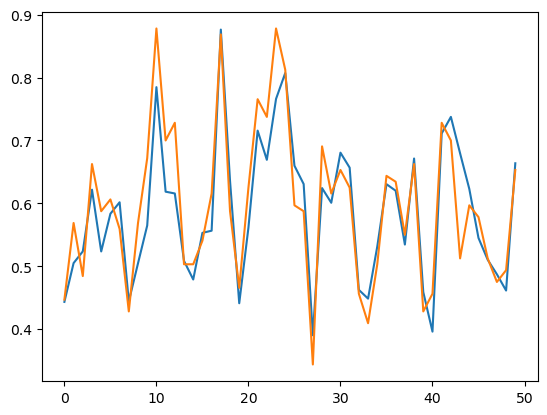

In [15]:
import os
model.save(os.path.join('./model','lstm.h5'))

# Generate predictions
trainpred = model.predict(X_train)
testpred = model.predict(X_test)
print (trainpred.shape)
print (Y_train.shape)
plt.cla()
plt.plot(trainpred[:50])
plt.plot(Y_train[:50])

#plt.plot(testpred[:50,0:5])
plt.show()